# 프로젝트 : 인공 지능과 가위바위보 하기

## 1. 데이터 준비하기
- **이미지 분류기 모델 선정하기**
- **데이터 생성하기**
- **테스트 데이터 불러오기**

## 2. 딥러닝 학습하기
- **딥러닝 네트워크 설계하기**
- **딥러닝 네트워크 성능 확인하기**

## 3. 성능 향상하기


- - -
### 데이터 준비하기
- **이미지 분류기 모델 선정하기**

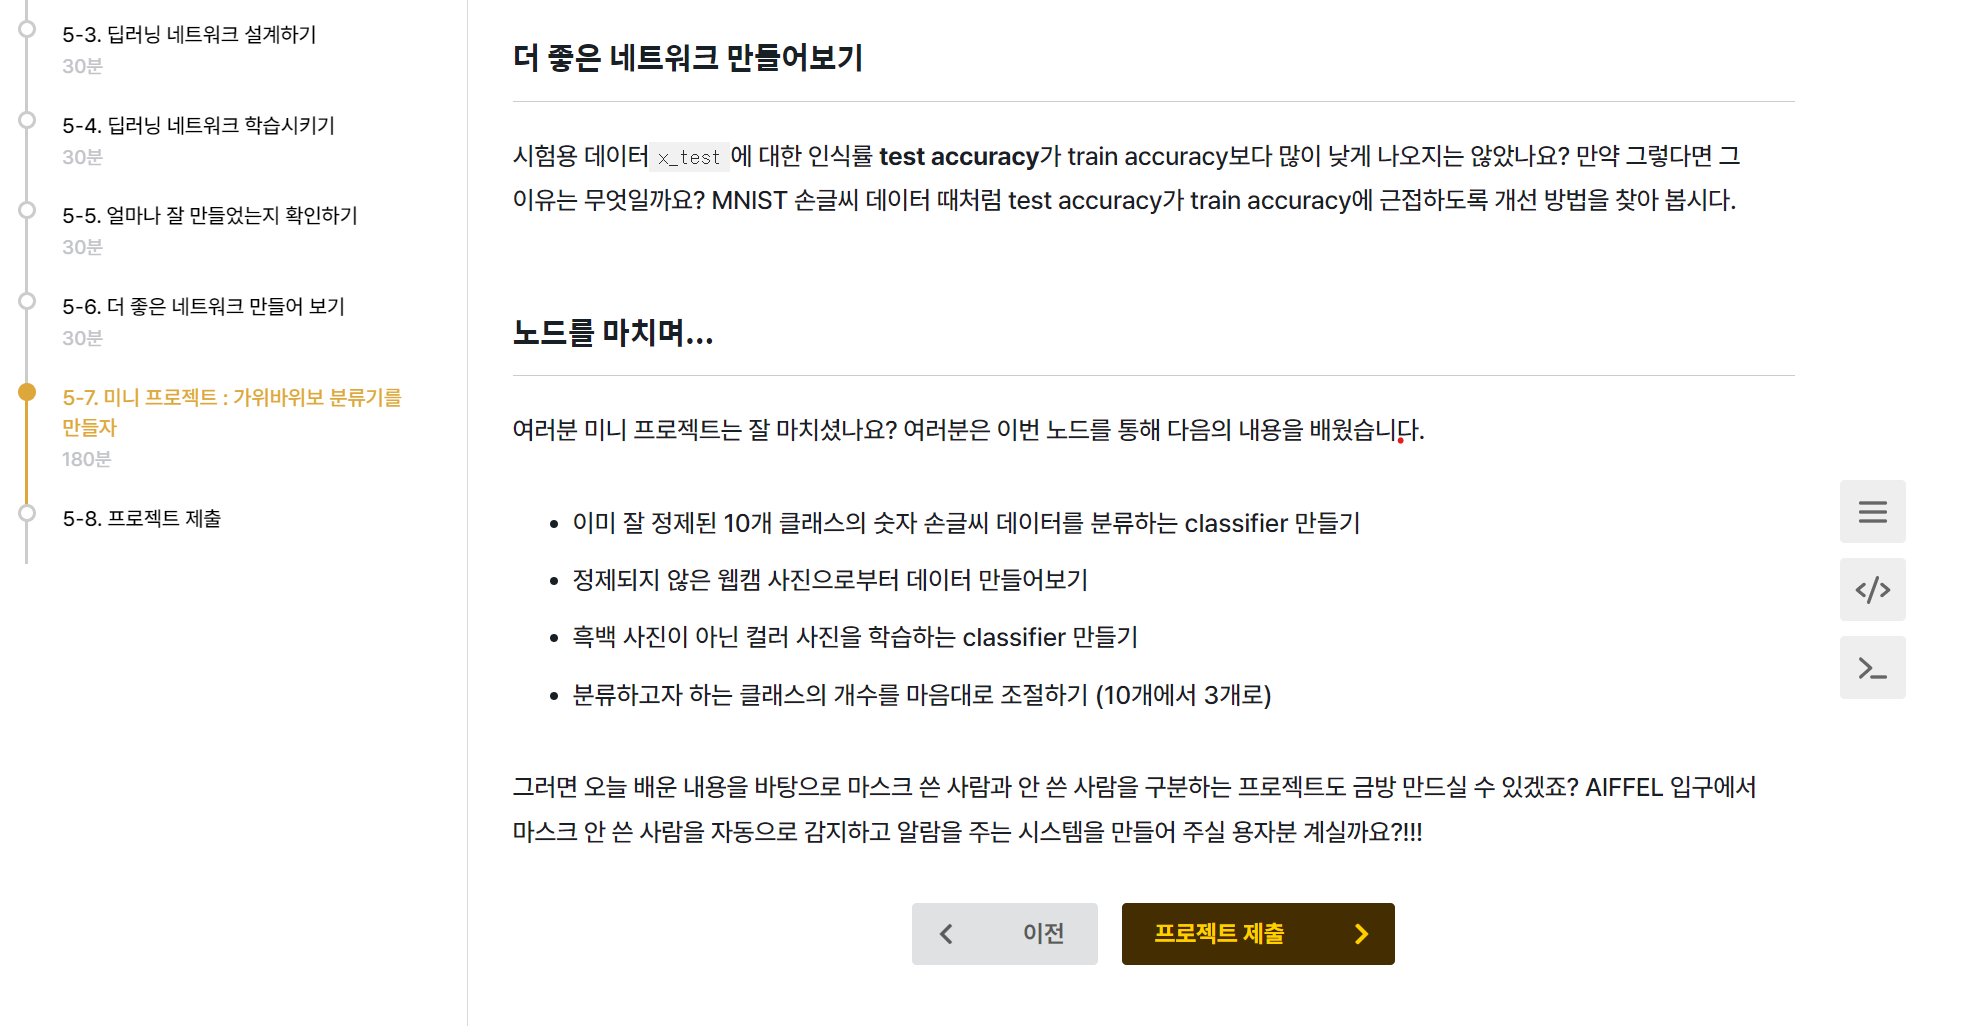

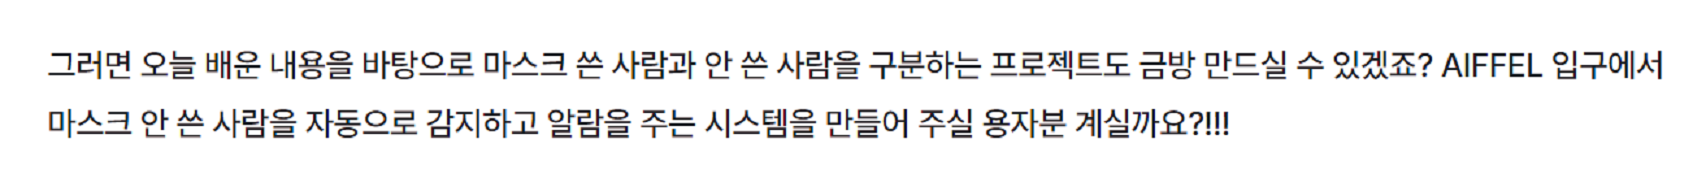

<u>마스크 착용 유무를 분류하는 모델을 만들어보겠습니다.</u>

- - -
### 데이터 준비하기
- **데이터 생성하기**

[teachable machine](https://teachablemachine.withgoogle.com/)에서 이미지 데이터를 직접 만들어줍니다.

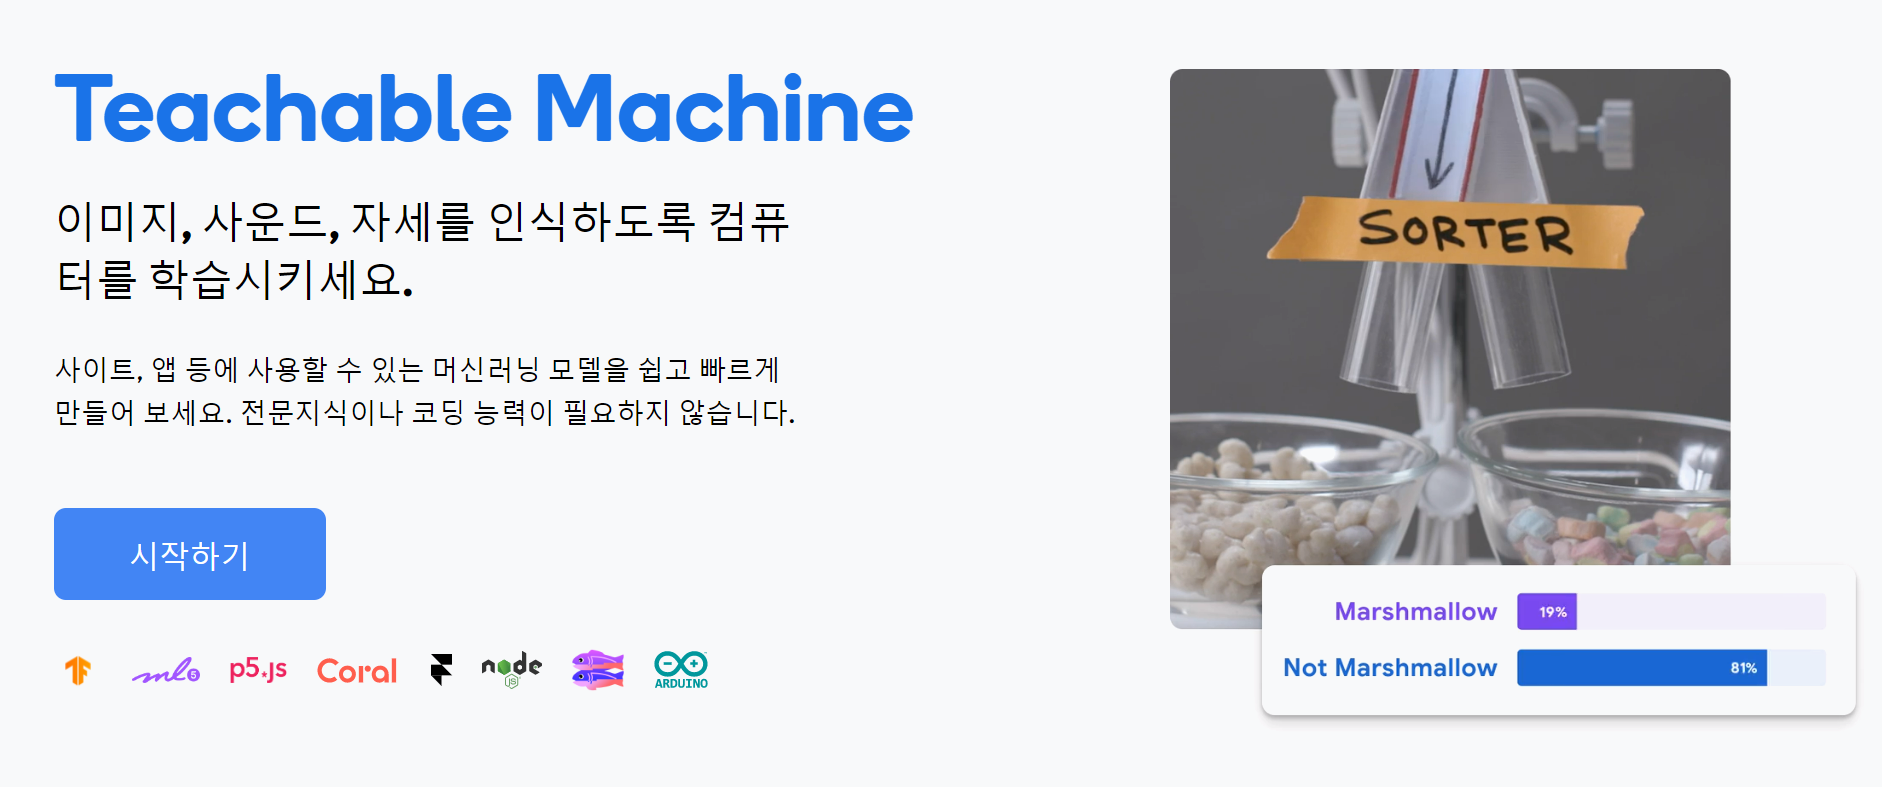

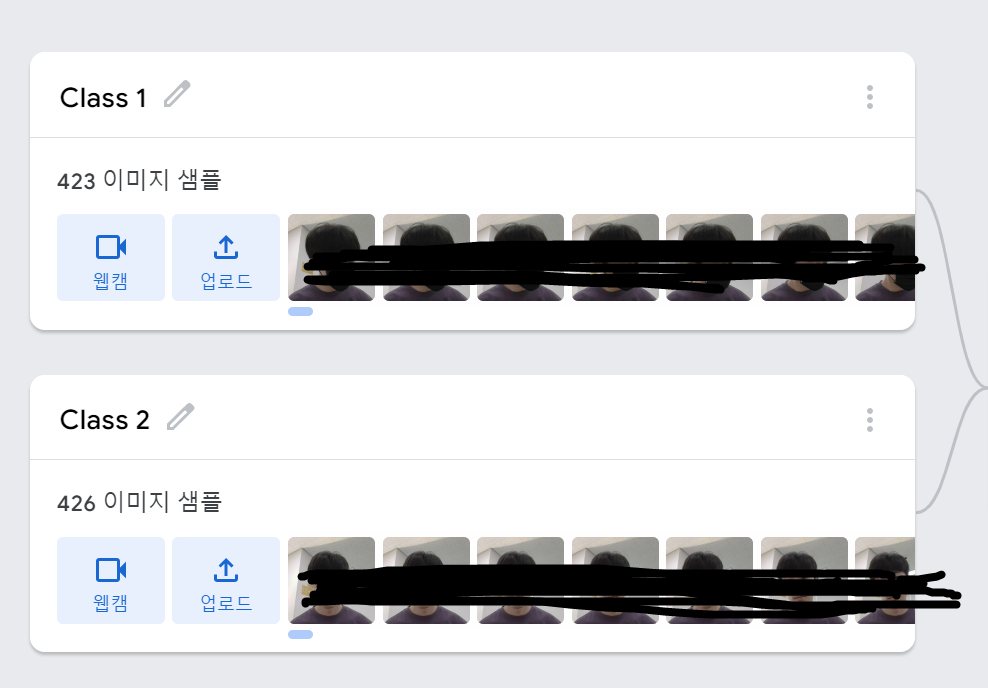

마스크를 쓴 사진과 안 쓴 사진을 각각의 클래스에 담고 로컬에 저장합니다.

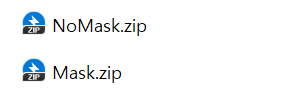

In [1]:
!mkdir -p ~/aiffel/EXPLORATION/dataset/mask/Mask
!mkdir -p ~/aiffel/EXPLORATION/dataset/mask/NoMask

**aiffel**의 클라우드 경로에 새로운 폴더를 추가하고 데이터셋을 업로드합니다.

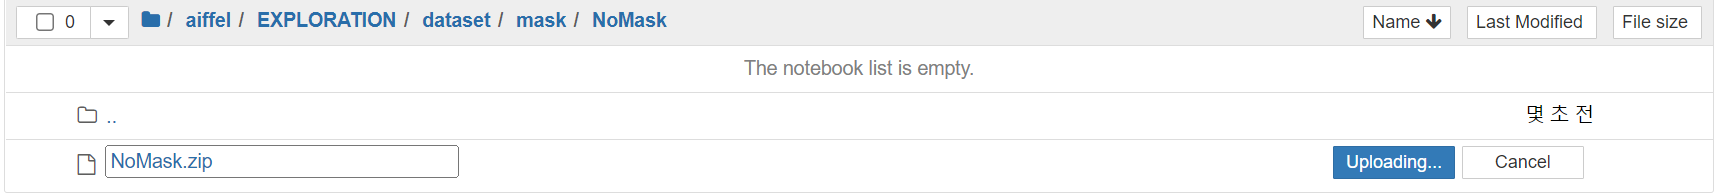

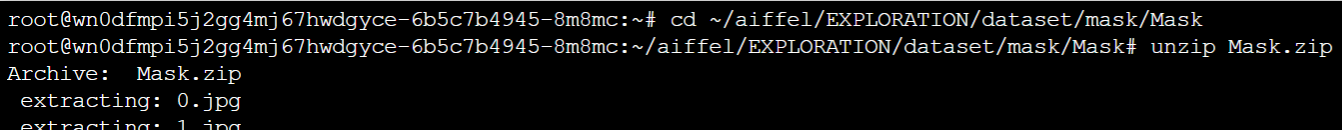

In [2]:
from PIL import Image
import glob
import os

img_size = 128 # 이미지 사이즈 상수
img_pixel = (128, 128) # 이미지 픽셀값 상수
color = 3 # 컬러 채널 상수

def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")  
    
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(img_pixel, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), "images resized.")

image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/dataset/mask/NoMask"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/dataset/mask/Mask"
resize_images(image_dir_path)

695 images resized.
1083 images resized.


불러온 이미지의 크기를 128x128 픽셀로 조정해줍니다.

In [3]:
import numpy as np

def load_data(img_path, number_of_data=1778):
    # 마스크 미착용 : 0, 마스크 착용 : 1
    
    imgs = np.zeros(number_of_data*img_size*img_size*color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype=np.int32)

    idx = 0
    for file in glob.iglob(img_path + '/NoMask/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img
        labels[idx] = 0 # 마스크 미착용 : 0
        idx += 1

    for file in glob.iglob(img_path + '/Mask/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img
        labels[idx] = 1 # 마스크 착용 : 1
        idx += 1
        
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/dataset/mask"
(X_train, y_train) = load_data(image_dir_path)
X_train = X_train / 255.0

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (1778, 128, 128, 3)
y_train shape: (1778,)


`train` 데이터의 레이블을 생성합니다.

마스크 미착용은 0, 착용은 1입니다.

- - -
### 데이터 준비하기
- **테스트 데이터 불러오기**

테스트용 데이터는 [캐글](https://www.kaggle.com/datasets/ashishjangra27/face-mask-12k-images-dataset)에서 받겠습니다.

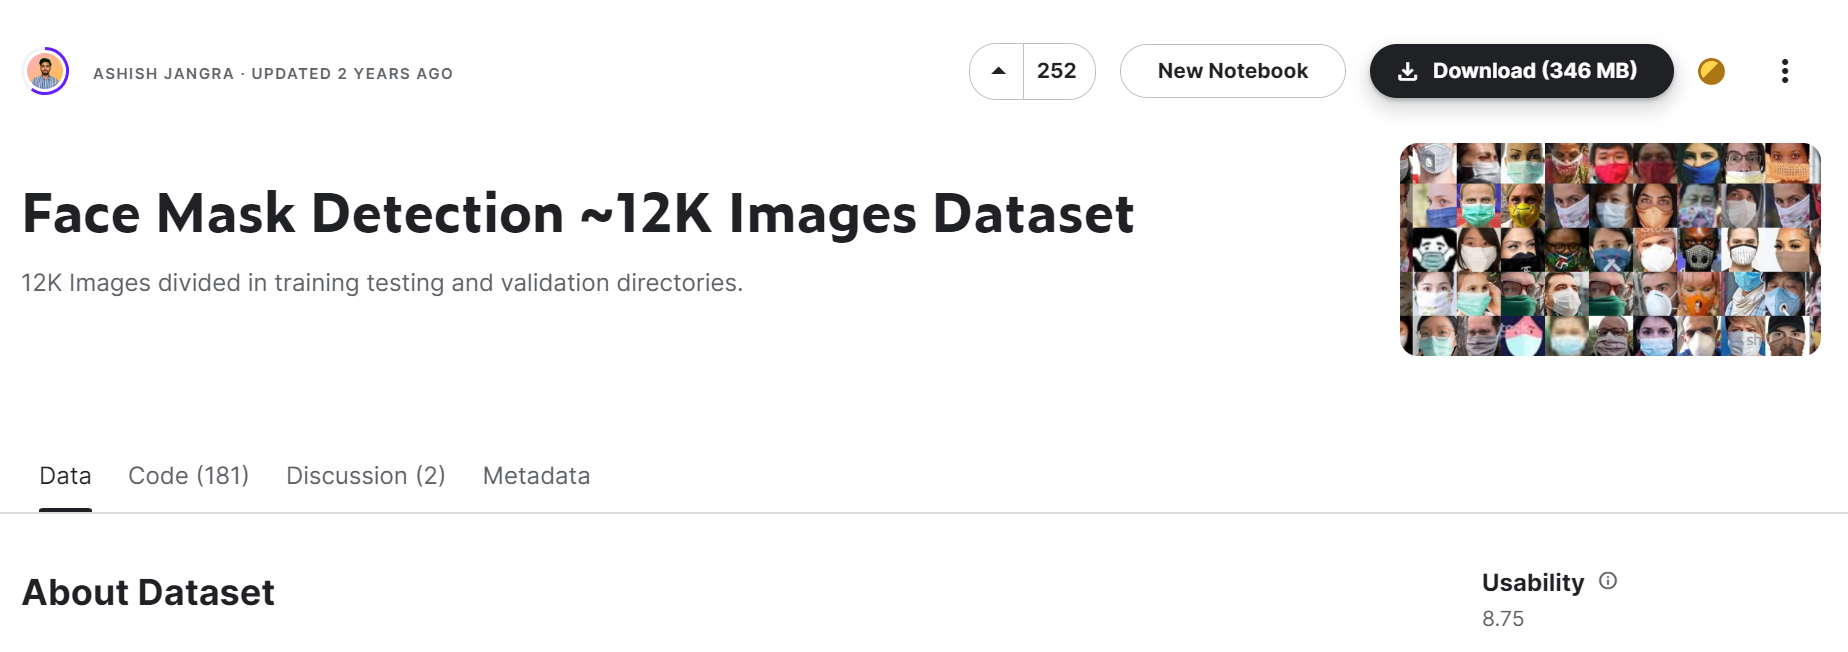

In [4]:
!mkdir -p ~/aiffel/EXPLORATION/dataset/mask/test

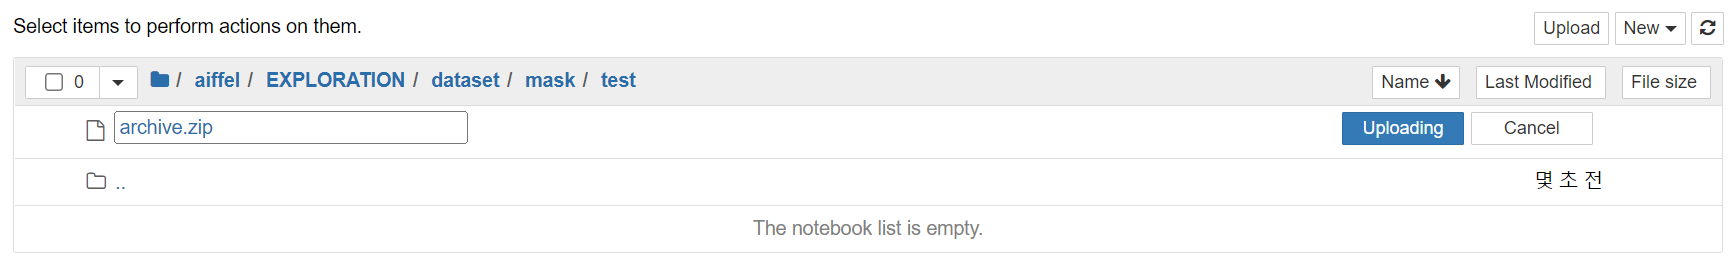

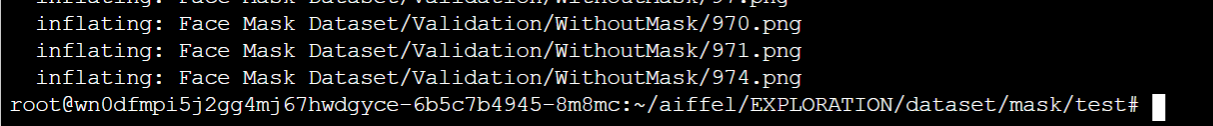

테스트용 데이터의 이미지 크기도 조정해줍니다.

In [5]:
def resize_images_for_testdata(img_path):
    images = glob.glob(img_path + "/*.png")  
    
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(img_pixel, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), "images resized.")

image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/dataset/mask/test/Face_Mask_Dataset/Test/WithoutMask"
resize_images_for_testdata(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/dataset/mask/test/Face_Mask_Dataset/Test/WithMask"
resize_images_for_testdata(image_dir_path)

509 images resized.
483 images resized.


In [6]:
def load_testdata(img_path, number_of_data=992):
    # 마스크 미착용 : 0, 마스크 착용 : 1
    
    imgs = np.zeros(number_of_data*img_size*img_size*color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype=np.int32)
    
    idx = 0
    for file in glob.iglob(img_path + '/WithoutMask/*.png'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img
        labels[idx] = 0 # 마스크 미착용 : 0
        idx += 1

    for file in glob.iglob(img_path + '/WithMask/*.png'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img
        labels[idx] = 1 # 마스크 착용 : 1
        idx += 1
        
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/dataset/mask/test/Face_Mask_Dataset/Test"
(X_test, y_test) = load_testdata(image_dir_path)
X_test = X_test / 255.0

print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (992, 128, 128, 3)
y_test shape: (992,)


- - -
### 딥러닝 학습하기
- **딥러닝 네트워크 설계하기**

In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

n_channel_1 = 32 # 얼마나 다양한 이미지의 특징을 살펴볼 것인가? Layer_1
n_channel_2 = 64 # 얼마나 다양한 이미지의 특징을 살펴볼 것인가? Layer_2
n_dense = 32 # 분류기 알고리즘을 얼마나 복잡하게 할 것인가?
n_train_epoch = 2 # 최종 분류기의 클래스 수

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3, 3), activation='relu', input_shape=(img_size, img_size, color)))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(n_channel_2, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(n_train_epoch, activation='softmax'))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                1843232   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 6

`keras` 파라미터 설정입니다.

In [8]:
def shuffle_in_unison_scary(a, b):
    s = np.arange(len(a))
    np.random.shuffle(s)
    
    a = a[s]
    b = b[s]
    
    return a, b

원래의 배열은 건드리지 않고 무작위로 섞은 데이터를 생성해주는 함수를 만들었습니다.

레이블과 따로 섞이지도 않습니다.

In [9]:
X_train_shuffle, y_train_shuffle = shuffle_in_unison_scary(X_train, y_train)

print('원래 배열')
print(y_train[:20])
print('============================================')
print('섞은 후')
print(y_train_shuffle[:20])

원래 배열
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
섞은 후
[1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1]


테스트용 데이터도 레이블이 정렬된 상태이니 마찬가지로 무작위로 섞어줍니다.

In [10]:
X_test_shuffle, y_test_shuffle = shuffle_in_unison_scary(X_test, y_test)

- - -
### 딥러닝 학습하기
- **딥러닝 네트워크 성능 확인하기**

다짜고짜 모델의 성능부터 확인해봅시다.

In [11]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train_shuffle, y_train_shuffle, epochs=10)

test_loss, test_accuracy = model.evaluate(X_test_shuffle, y_test_shuffle, verbose=2)

print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

Epoch 1/10
56/56 [==============================] - 4s 16ms/step - loss: 0.6982 - accuracy: 0.6789
Epoch 2/10
56/56 [==============================] - 1s 13ms/step - loss: 0.2687 - accuracy: 0.9753
Epoch 3/10
56/56 [==============================] - 1s 13ms/step - loss: 0.2388 - accuracy: 0.9983
Epoch 4/10
56/56 [==============================] - 1s 13ms/step - loss: 0.2177 - accuracy: 0.9994
Epoch 5/10
56/56 [==============================] - 1s 13ms/step - loss: 0.2003 - accuracy: 1.0000
Epoch 6/10
56/56 [==============================] - 1s 13ms/step - loss: 0.1849 - accuracy: 1.0000
Epoch 7/10
56/56 [==============================] - 1s 13ms/step - loss: 0.1711 - accuracy: 1.0000
Epoch 8/10
56/56 [==============================] - 1s 13ms/step - loss: 0.1586 - accuracy: 1.0000
Epoch 9/10
56/56 [==============================] - 1s 13ms/step - loss: 0.1473 - accuracy: 1.0000
Epoch 10/10
56/56 [==============================] - 1s 13ms/step - loss: 0.1369 - accuracy: 1.0000
31/31 - 0

정확도가 예상보다 높게 나옵니다.

학습용 데이터 사진을 잘 촬영한 모양입니다.

그럼 반대로 테스트용 데이터를 학습해서 학습용 데이터를 예측해보겠습니다.

In [12]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_test_shuffle, y_test_shuffle, epochs=10)

test_loss, test_accuracy = model.evaluate(X_train_shuffle, y_train_shuffle, verbose=2)

print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

Epoch 1/10
31/31 [==============================] - 1s 13ms/step - loss: 0.5956 - accuracy: 0.7117
Epoch 2/10
31/31 [==============================] - 0s 12ms/step - loss: 0.3430 - accuracy: 0.8911
Epoch 3/10
31/31 [==============================] - 0s 12ms/step - loss: 0.3154 - accuracy: 0.9012
Epoch 4/10
31/31 [==============================] - 0s 13ms/step - loss: 0.3028 - accuracy: 0.9002
Epoch 5/10
31/31 [==============================] - 0s 12ms/step - loss: 0.2805 - accuracy: 0.9183
Epoch 6/10
31/31 [==============================] - 0s 12ms/step - loss: 0.2909 - accuracy: 0.9083
Epoch 7/10
31/31 [==============================] - 0s 12ms/step - loss: 0.2592 - accuracy: 0.9224
Epoch 8/10
31/31 [==============================] - 0s 13ms/step - loss: 0.2496 - accuracy: 0.9254
Epoch 9/10
31/31 [==============================] - 0s 12ms/step - loss: 0.2356 - accuracy: 0.9446
Epoch 10/10
31/31 [==============================] - 0s 12ms/step - loss: 0.2320 - accuracy: 0.9395
56/56 - 0

그래도 상당히 높은 정확도를 보여줍니다.

제가 테스트용 데이터 또한 좋은 데이터로 가져온 것 같습니다.

Epoch 1/10
45/45 [==============================] - 1s 25ms/step - loss: 0.1310 - accuracy: 0.9761 - val_loss: 0.0872 - val_accuracy: 1.0000
Epoch 2/10
45/45 [==============================] - 1s 15ms/step - loss: 0.0885 - accuracy: 0.9993 - val_loss: 0.0791 - val_accuracy: 1.0000
Epoch 3/10
45/45 [==============================] - 1s 15ms/step - loss: 0.0814 - accuracy: 1.0000 - val_loss: 0.0734 - val_accuracy: 1.0000
Epoch 4/10
45/45 [==============================] - 1s 15ms/step - loss: 0.0756 - accuracy: 1.0000 - val_loss: 0.0682 - val_accuracy: 1.0000
Epoch 5/10
45/45 [==============================] - 1s 15ms/step - loss: 0.0703 - accuracy: 1.0000 - val_loss: 0.0635 - val_accuracy: 1.0000
Epoch 6/10
45/45 [==============================] - 1s 15ms/step - loss: 0.0655 - accuracy: 1.0000 - val_loss: 0.0592 - val_accuracy: 1.0000
Epoch 7/10
45/45 [==============================] - 1s 15ms/step - loss: 0.0612 - accuracy: 1.0000 - val_loss: 0.0554 - val_accuracy: 1.0000
Epoch 8/10
45

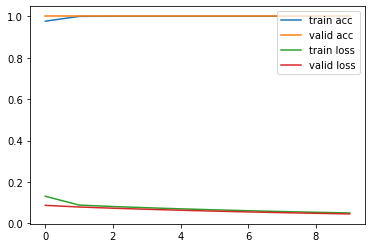

In [13]:
import matplotlib.pyplot as plt

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(X_train_shuffle, y_train_shuffle, validation_split=0.2, epochs=10)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train acc', 'valid acc', 'train loss', 'valid loss'], loc='upper right')
plt.show()

첫번 째 포크에서 이미 `loss`가 0에 가깝게 내려갔습니다.

In [14]:
predicted_result = model.predict(X_test_shuffle)
predicted_labels = np.argmax(predicted_result, axis=1)

> `np.argmax`는 <u>배열에서 가장 높은 값의 **인덱스**</u>를 반환합니다.  
> `model.predict`을 해서 생긴 값은 `[0.17, 0.59, 0.24]`와 같은 형식으로 각 레이블에 대한 예측 신뢰도를 매깁니다.  
> 이 중 가장 높은 값을 최종 예측으로 결정하기 때문에 `np.argmax`를 이용하면 어떤 결정들을 내렸는지 확인할 수 있습니다.

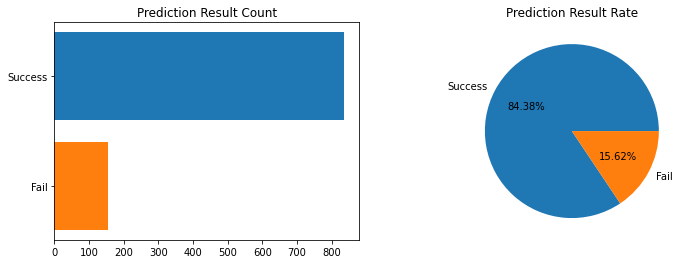

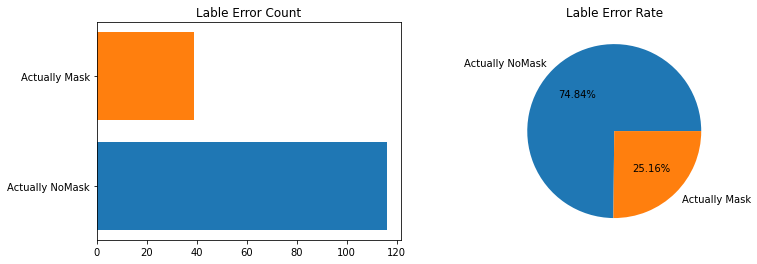

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

def error_visualization(labels, predction):
    df = pd.DataFrame([labels, predction], index=['lable', 'pred']).T
    df['true'] = (df['lable'] == df['pred'])
    
    true_count = df['true'].value_counts()
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.barh(true_count.keys(), true_count.values, color=['#1f77b4', '#ff7f0e'])
    plt.yticks([True, False], labels=['Success', 'Fail'])
    plt.title('Prediction Result Count')
    plt.subplot(1, 2, 2)
    plt.pie([true_count[True], true_count[False]], labels=['Success', 'Fail'], autopct='%.2f%%')
    plt.title('Prediction Result Rate')
    plt.show()
    
    lable_count = df['lable'].loc[df['true']==False].value_counts()
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.barh(lable_count.keys(), lable_count.values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
    plt.yticks([0, 1], ['Actually NoMask', 'Actually Mask'])
    plt.title('Lable Error Count')
    plt.subplot(1, 2, 2)
    plt.pie([lable_count[0], lable_count[1]], labels=['Actually NoMask', 'Actually Mask'], autopct='%.2f%%')
    plt.title('Lable Error Rate')
    plt.show()

error_visualization(y_test_shuffle, predicted_labels)

정확도가 높다고는 해도 예측에 실패한 데이터를 살펴보니

마스크를 안썼는데 썼다고 하는 것보다  
마스크를 썼는데 안썼다고 잘못 예측하는 경우가 압도적으로 많습니다.

이제 `keras`의 파라미터 수정을 통해 이 부분을 개선할 수 있는지 확인해보겠습니다.

- - -
### 성능 향상하기

아직은 학습을 복잡하고 다양하게 할수록 좋은지 나쁜지를 모르니까 이번에도 다짜고짜 수정해봅시다.

In [16]:
def mlp_model(n_channel_1, n_channel_2, n_dense, n_train_epoch):
    model = keras.models.Sequential()
    
    model.add(keras.layers.Conv2D(n_channel_1, (3, 3), activation='relu', input_shape=(img_size, img_size, color)))
    model.add(keras.layers.MaxPool2D(2, 2))
    model.add(keras.layers.Conv2D(n_channel_2, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(n_dense, activation='relu'))
    model.add(keras.layers.Dense(n_train_epoch, activation='softmax'))
    
    model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
    
    return model

모델을 관리하기 쉽도록 함수를 만들었습니다.

In [17]:
def show_history(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['train acc', 'valid acc', 'train loss', 'valid loss'], loc='upper right')
    plt.show()

`loss` 그래프 시각화 함수입니다.

In [18]:
n_channel_1 = 16 # 32 → 16
n_channel_2 = 32 # 64 → 32
n_dense = 16 # 32 → 16
n_train_epoch = 2 # 최종 분류기의 클래스 수

model = mlp_model(n_channel_1, n_channel_2, n_dense, n_train_epoch)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                460816    
_________________________________________________________________
dense_3 (Dense)              (None, 2)                

`n_channel_1`과 `n_dense`는 32에서 16으로,

`n_channel_2`는 64에서 32로 변경해봤습니다.

Epoch 1/10
45/45 [==============================] - 1s 18ms/step - loss: 0.4731 - accuracy: 0.7103 - val_loss: 0.2882 - val_accuracy: 0.8034
Epoch 2/10
45/45 [==============================] - 0s 9ms/step - loss: 0.2750 - accuracy: 0.9719 - val_loss: 0.2358 - val_accuracy: 0.9972
Epoch 3/10
45/45 [==============================] - 0s 9ms/step - loss: 0.2457 - accuracy: 0.9951 - val_loss: 0.2193 - val_accuracy: 1.0000
Epoch 4/10
45/45 [==============================] - 0s 9ms/step - loss: 0.2257 - accuracy: 1.0000 - val_loss: 0.2035 - val_accuracy: 1.0000
Epoch 5/10
45/45 [==============================] - 0s 9ms/step - loss: 0.2105 - accuracy: 1.0000 - val_loss: 0.1924 - val_accuracy: 1.0000
Epoch 6/10
45/45 [==============================] - 0s 9ms/step - loss: 0.1986 - accuracy: 1.0000 - val_loss: 0.1791 - val_accuracy: 1.0000
Epoch 7/10
45/45 [==============================] - 0s 9ms/step - loss: 0.1850 - accuracy: 1.0000 - val_loss: 0.1679 - val_accuracy: 1.0000
Epoch 8/10
45/45 [=

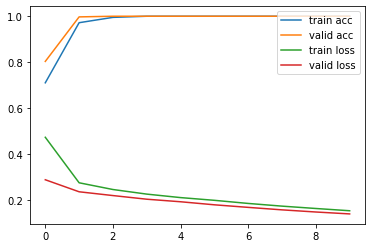

31/31 - 0s - loss: 0.4928 - accuracy: 0.8780
test_loss: 0.49279600381851196
test_accuracy: 0.8780242204666138


In [19]:
history = model.fit(X_train_shuffle, y_train_shuffle, validation_split=0.2, epochs=10)

show_history(history)

test_loss, test_accuracy = model.evaluate(X_test_shuffle, y_test_shuffle, verbose=2)

print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

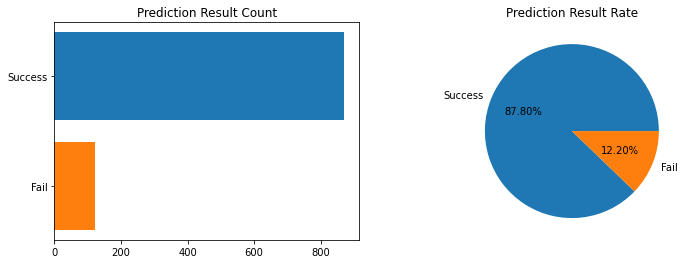

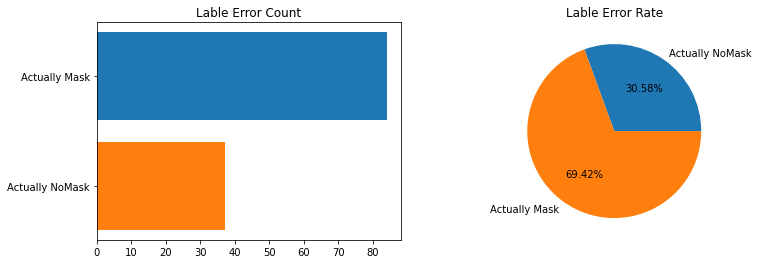

In [20]:
predicted_result = model.predict(X_test_shuffle)
predicted_labels = np.argmax(predicted_result, axis=1)

error_visualization(y_test_shuffle, predicted_labels)

이번엔 마스크를 썼는데 안썼다고 잘못 예측하는 경우가 많아지고 전체적인 성능은 그대로입니다.

In [21]:
n_channel_1 = 64 # 32 → 64
n_channel_2 = 128 # 64 → 128
n_dense = 64 # 32 → 64
n_train_epoch = 2 # 최종 분류기의 클래스 수

model = mlp_model(n_channel_1, n_channel_2, n_dense, n_train_epoch)

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 61, 61, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 115200)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                7372864   
_________________________________________________________________
dense_5 (Dense)              (None, 2)                

이번엔 다양성과 복잡도를 더 늘려봤습니다.

Epoch 1/10
45/45 [==============================] - 3s 40ms/step - loss: 0.4343 - accuracy: 0.8622 - val_loss: 0.4453 - val_accuracy: 0.8511
Epoch 2/10
45/45 [==============================] - 1s 27ms/step - loss: 0.0321 - accuracy: 0.9902 - val_loss: 0.0144 - val_accuracy: 0.9944
Epoch 3/10
45/45 [==============================] - 1s 27ms/step - loss: 7.1577e-04 - accuracy: 1.0000 - val_loss: 8.0407e-04 - val_accuracy: 1.0000
Epoch 4/10
45/45 [==============================] - 1s 27ms/step - loss: 2.9077e-04 - accuracy: 1.0000 - val_loss: 1.2710e-04 - val_accuracy: 1.0000
Epoch 5/10
45/45 [==============================] - 1s 27ms/step - loss: 4.7535e-05 - accuracy: 1.0000 - val_loss: 2.4445e-04 - val_accuracy: 1.0000
Epoch 6/10
45/45 [==============================] - 1s 27ms/step - loss: 3.4806e-05 - accuracy: 1.0000 - val_loss: 9.5068e-05 - val_accuracy: 1.0000
Epoch 7/10
45/45 [==============================] - 1s 27ms/step - loss: 1.9369e-05 - accuracy: 1.0000 - val_loss: 4.4102e

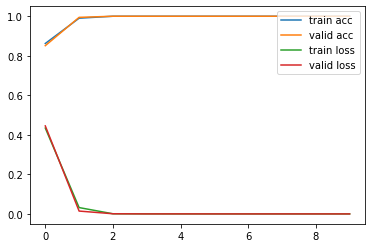

31/31 - 0s - loss: 1.0901 - accuracy: 0.8881
test_loss: 1.09014892578125
test_accuracy: 0.8881048560142517


In [22]:
history = model.fit(X_train_shuffle, y_train_shuffle, validation_split=0.2, epochs=10)

show_history(history)

test_loss, test_accuracy = model.evaluate(X_test_shuffle, y_test_shuffle, verbose=2)

print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

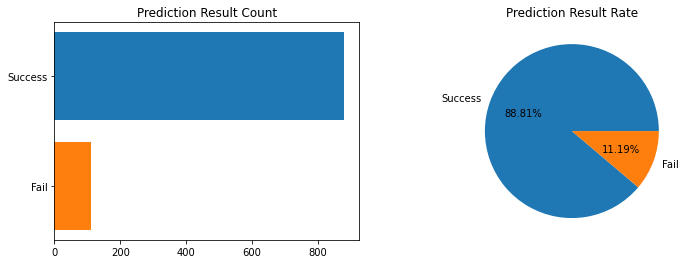

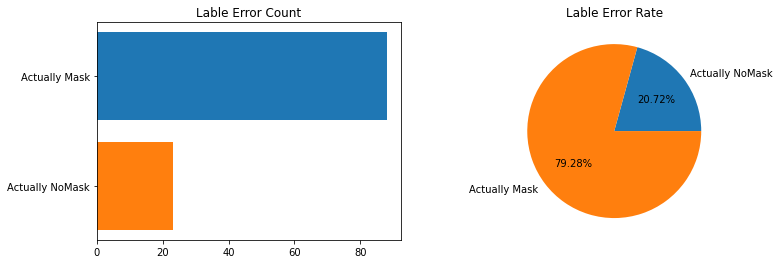

In [23]:
predicted_result = model.predict(X_test_shuffle)
predicted_labels = np.argmax(predicted_result, axis=1)

error_visualization(y_test_shuffle, predicted_labels)

아까와 비슷합니다.

In [24]:
n_channel_1 = 32
n_channel_2 = 64
n_dense = 32
n_train_epoch = 2

model = mlp_model(n_channel_1, n_channel_2, n_dense, n_train_epoch)

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                1843232   
_________________________________________________________________
dense_7 (Dense)              (None, 2)                

Epoch 1/5
45/45 [==============================] - 1s 21ms/step - loss: 0.2159 - accuracy: 0.9170 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 2/5
45/45 [==============================] - 1s 15ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 9.4891e-04 - val_accuracy: 1.0000
Epoch 3/5
45/45 [==============================] - 1s 15ms/step - loss: 9.1744e-04 - accuracy: 1.0000 - val_loss: 6.7157e-04 - val_accuracy: 1.0000
Epoch 4/5
45/45 [==============================] - 1s 15ms/step - loss: 2.2697e-04 - accuracy: 1.0000 - val_loss: 2.4604e-04 - val_accuracy: 1.0000
Epoch 5/5
45/45 [==============================] - 1s 15ms/step - loss: 1.2826e-04 - accuracy: 1.0000 - val_loss: 1.4838e-04 - val_accuracy: 1.0000


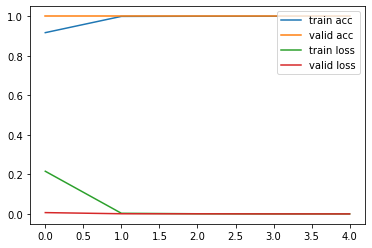

31/31 - 0s - loss: 1.0297 - accuracy: 0.8175
test_loss: 1.0297386646270752
test_accuracy: 0.8175403475761414


In [25]:
history = model.fit(X_train_shuffle, y_train_shuffle, validation_split=0.2, epochs=5)

show_history(history)

test_loss, test_accuracy = model.evaluate(X_test_shuffle, y_test_shuffle, verbose=2)

print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

이번엔 하이퍼파라미터를 원래대로 수정하고

학습을 5번만 반복해봤습니다.

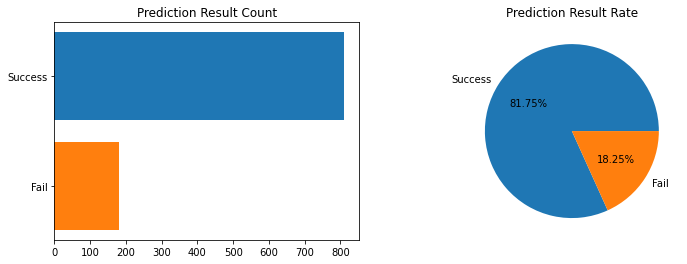

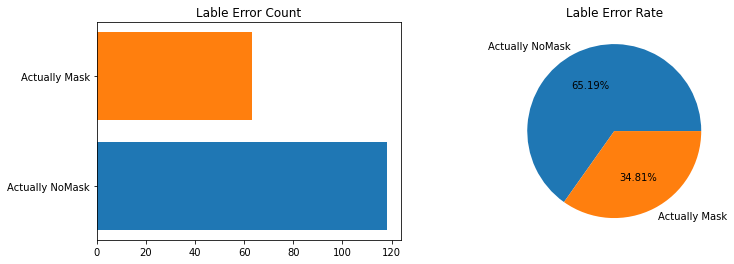

In [26]:
predicted_result = model.predict(X_test_shuffle)
predicted_labels = np.argmax(predicted_result, axis=1)

error_visualization(y_test_shuffle, predicted_labels)

오차 비중은 비슷해졌지만 그냥 전체 정확도가 떨어져서 그런 것 같습니다.

Epoch 1/10
45/45 [==============================] - 1s 19ms/step - loss: 7.6128e-05 - accuracy: 1.0000 - val_loss: 1.1864e-04 - val_accuracy: 1.0000
Epoch 2/10
45/45 [==============================] - 1s 15ms/step - loss: 4.8327e-05 - accuracy: 1.0000 - val_loss: 1.0111e-04 - val_accuracy: 1.0000
Epoch 3/10
45/45 [==============================] - 1s 15ms/step - loss: 3.0074e-05 - accuracy: 1.0000 - val_loss: 5.9318e-05 - val_accuracy: 1.0000
Epoch 4/10
45/45 [==============================] - 1s 15ms/step - loss: 1.8529e-05 - accuracy: 1.0000 - val_loss: 2.6409e-05 - val_accuracy: 1.0000
Epoch 5/10
45/45 [==============================] - 1s 15ms/step - loss: 1.2183e-05 - accuracy: 1.0000 - val_loss: 1.9044e-05 - val_accuracy: 1.0000
Epoch 6/10
45/45 [==============================] - 1s 15ms/step - loss: 7.1782e-06 - accuracy: 1.0000 - val_loss: 1.4415e-05 - val_accuracy: 1.0000
Epoch 7/10
45/45 [==============================] - 1s 14ms/step - loss: 5.0005e-06 - accuracy: 1.0000 - v

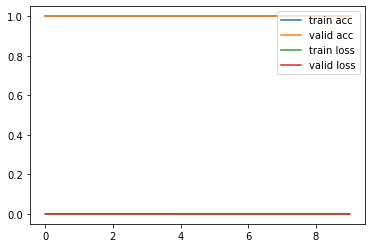

31/31 - 0s - loss: 2.1133 - accuracy: 0.7702
test_loss: 2.1133008003234863
test_accuracy: 0.7701612710952759


In [27]:
history = model.fit(X_train_shuffle, y_train_shuffle, validation_split=0.2, epochs=10)

show_history(history)

test_loss, test_accuracy = model.evaluate(X_test_shuffle, y_test_shuffle, verbose=2)

print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

학습을 5번에서 10번을 더 해서 총 15번 반복해봤습니다.

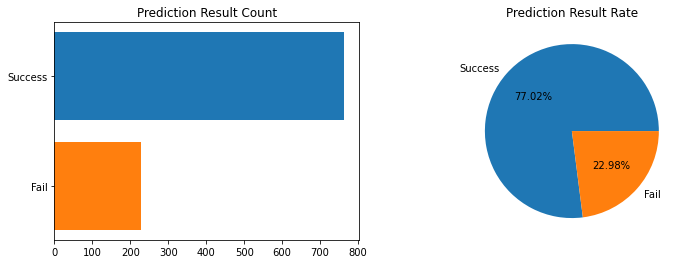

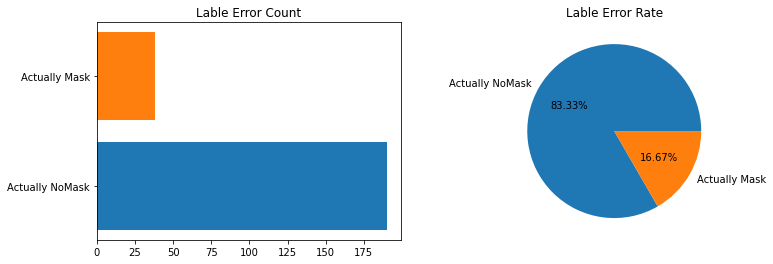

In [28]:
predicted_result = model.predict(X_test_shuffle)
predicted_labels = np.argmax(predicted_result, axis=1)

error_visualization(y_test_shuffle, predicted_labels)

더 안좋아졌습니다.

오버피팅이 일어나고 있다는 거고, 특정 레이블의 데이터에 문제가 있는 것은 아닌 것 같습니다.

In [29]:
n_channel_1 = 4 # 32 → 4
n_channel_2 = 8 # 64 → 8
n_dense = 4 # 32 → 4
n_train_epoch = 2 # 최종 분류기의 클래스 수

model = mlp_model(n_channel_1, n_channel_2, n_dense, n_train_epoch)

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 126, 126, 4)       112       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 63, 63, 4)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 61, 61, 8)         296       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 30, 30, 8)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 28804     
_________________________________________________________________
dense_9 (Dense)              (None, 2)                

Epoch 1/50
45/45 [==============================] - 1s 15ms/step - loss: 0.2383 - accuracy: 0.9184 - val_loss: 0.0603 - val_accuracy: 0.9803
Epoch 2/50
45/45 [==============================] - 0s 7ms/step - loss: 0.0256 - accuracy: 0.9937 - val_loss: 0.0129 - val_accuracy: 1.0000
Epoch 3/50
45/45 [==============================] - 0s 6ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 4/50
45/45 [==============================] - 0s 7ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 1.0000
Epoch 5/50
45/45 [==============================] - 0s 7ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 6/50
45/45 [==============================] - 0s 6ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 7/50
45/45 [==============================] - 0s 6ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 8/50
45/45 [=

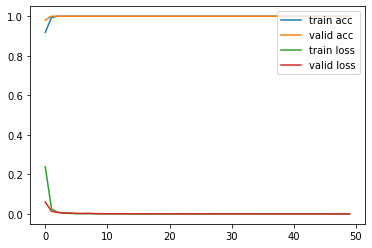

31/31 - 0s - loss: 2.5445 - accuracy: 0.8075
test_loss: 2.5444767475128174
test_accuracy: 0.8074596524238586


In [30]:
history = model.fit(X_train_shuffle, y_train_shuffle, validation_split=0.2, epochs=50)

show_history(history)

test_loss, test_accuracy = model.evaluate(X_test_shuffle, y_test_shuffle, verbose=2)

print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

이번엔 복잡도를 줄이고 학습을 더 많이 반복해봤습니다.

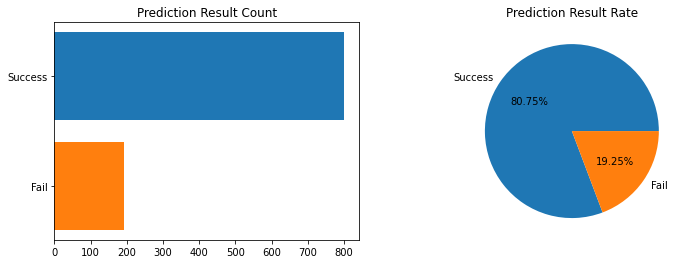

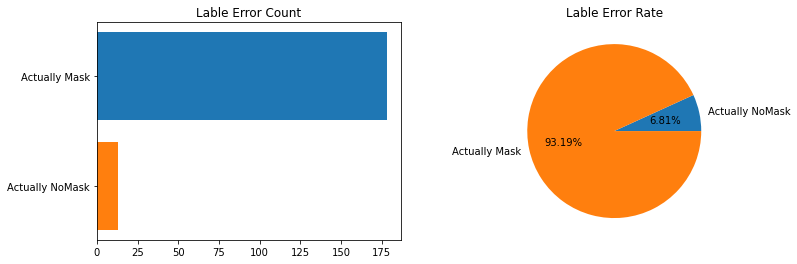

In [31]:
predicted_result = model.predict(X_test_shuffle)
predicted_labels = np.argmax(predicted_result, axis=1)

error_visualization(y_test_shuffle, predicted_labels)

오버피팅이 심할수록 예측하는 레이블이 편파적이게 된다고 볼 수 있겠습니다.

In [32]:
n_channel_1 = 128 # 32 → 128
n_channel_2 = 256 # 64 → 256
n_dense = 128 # 32 → 128
n_train_epoch = 2 # 최종 분류기의 클래스 수

model = mlp_model(n_channel_1, n_channel_2, n_dense, n_train_epoch)

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 126, 126, 128)     3584      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 63, 63, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 61, 61, 256)       295168    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 30, 30, 256)       0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 230400)            0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               29491328  
_________________________________________________________________
dense_11 (Dense)             (None, 2)                

Epoch 1/3
45/45 [==============================] - 5s 81ms/step - loss: 0.8493 - accuracy: 0.8383 - val_loss: 0.0164 - val_accuracy: 0.9916
Epoch 2/3
45/45 [==============================] - 3s 58ms/step - loss: 0.0150 - accuracy: 0.9965 - val_loss: 0.0054 - val_accuracy: 0.9972
Epoch 3/3
45/45 [==============================] - 3s 58ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 8.7451e-04 - val_accuracy: 1.0000


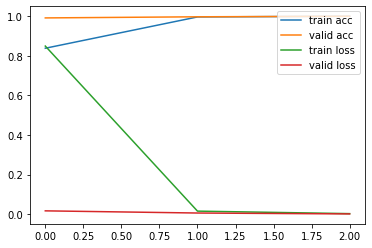

31/31 - 1s - loss: 0.9857 - accuracy: 0.8639
test_loss: 0.9856927990913391
test_accuracy: 0.8639112710952759


In [33]:
history = model.fit(X_train_shuffle, y_train_shuffle, validation_split=0.2, epochs=3)

show_history(history)

test_loss, test_accuracy = model.evaluate(X_test_shuffle, y_test_shuffle, verbose=2)

print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

이번에는 모델의 복잡도를 더하고 학습을 3번만 반복해봤습니다.

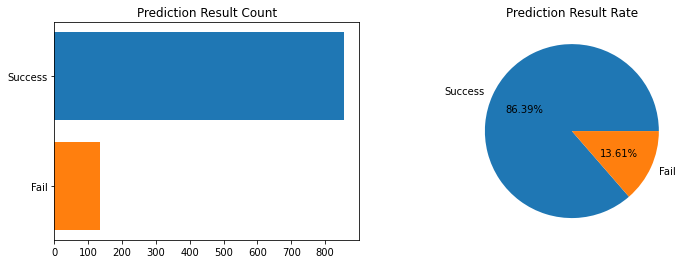

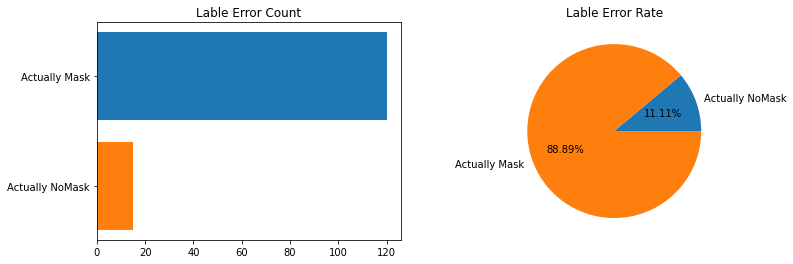

In [34]:
predicted_result = model.predict(X_test_shuffle)
predicted_labels = np.argmax(predicted_result, axis=1)

error_visualization(y_test_shuffle, predicted_labels)

다양성과 복잡도 설정도 오버피팅에 직결적인 연관이 있는 것 같습니다.

하이퍼파라미터 설정은 여기까지 시도해보고

예측에 실패한 것 중에서 특히 예측이 크게 어긋난 이미지를 확인해보겠습니다.

예측확률분포: [6.5094895e-14 1.0000000e+00]
라벨: 0, 예측결과: 1


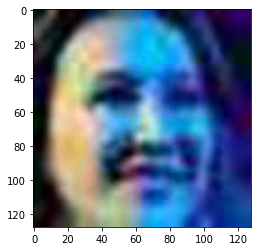

예측확률분포: [2.6617883e-07 9.9999976e-01]
라벨: 0, 예측결과: 1


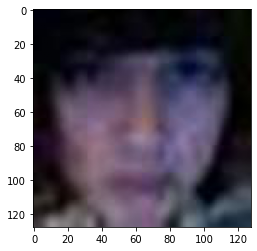

예측확률분포: [9.9999964e-01 3.4949292e-07]
라벨: 1, 예측결과: 0


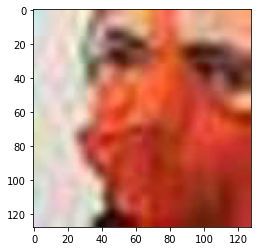

예측확률분포: [9.9999952e-01 4.6820196e-07]
라벨: 1, 예측결과: 0


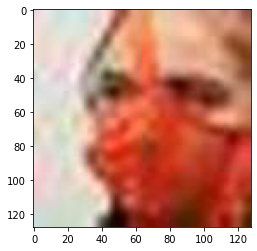

예측확률분포: [1.7996086e-06 9.9999821e-01]
라벨: 0, 예측결과: 1


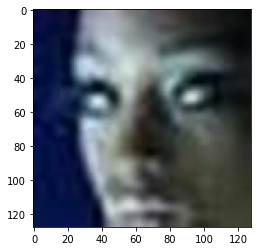

In [35]:
wrong_predict_list=[]

for i, value in enumerate(predicted_result):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test_shuffle[i]:
        wrong_predict_list.append([i, value])

wrong_predict_list.sort(key=lambda x: x[1].max(), reverse=True)

for i in wrong_predict_list[:5]:
    i = i[0]
    print("예측확률분포: " + str(predicted_result[i]))
    print("라벨: " + str(y_test_shuffle[i]) + ", 예측결과: " + str(predicted_labels[i]))
    plt.imshow(X_test_shuffle[i], cmap=plt.cm.binary)
    plt.show()

## 마무리하며

제가 검은 마스크와 흰 마스크를 착용하고 이미지를 촬영했는데

그 외의 색깔 마스크들을 잘 예측하지 못한 것 같습니다.

마스크를 썼다고 잘못 예측한 이유는 잘 모르겠습니다. 뭔가 제가 마스크를 쓴 모습과 겹치는 부분이 있었겠죠.

데이터도 그리 많지 않아서 어떻게 섞이느냐에 따라 정확도가 크게 요동치는 것 같습니다.

최종적으로 파라미터보단 어떤 이미지를 학습했냐에 따라 결과가 크게 달라지는 것 같습니다.

처음에 검은 마스크만 쓰고 카메라에서 멀리 떨어져서 촬영한 이미지를 모았을 때

정확도가 찍은 수준인 50%가 나왔었습니다. 예측 레이블을 확인해보니 예측 레이블이 거의 다 한 클래스로 통일되어 있었구요.

데이터 전처리를 위해 흰 마스크도 쓰고 얼굴이 크게 나온 이미지를 추가해야겠다 싶어서 다시 촬영하고 데이터 전처리 과정에 담으려 했으나

원래 있던 이미지 파일명에 새로운 이미지 데이터가 덮어씌워지면서 전부 날라가버렸습니다.

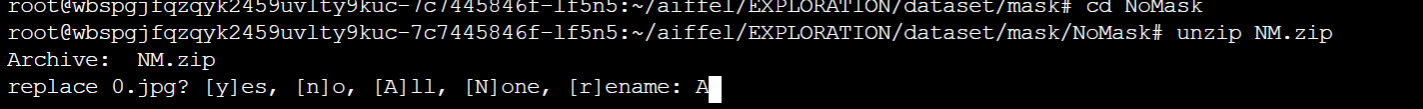

이미지를 다시 촬영하는 과정의 캡쳐도 깜빡하고 담지 못했습니다..

제가 넣은 데이터가 잘 들어갔나 확인 및 인증 겸 아무거나 하나 투척하고 갑니다. 

처음에 보여드린 모자이크 이미지에서 배경이 많이 다를겁니다. ~~(제발 마스크...)~~

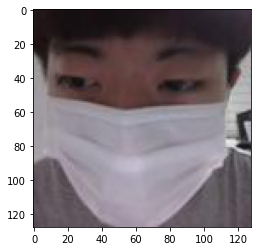

In [36]:
plt.imshow(X_train_shuffle[0], cmap=plt.cm.binary)
plt.show()

라고 이대로 끝내면 가위바위보 분류기 모델을 예상한 프로젝트 평가 기준에 미치지 못할까봐

위에서 만들었던 함수와 터득한 노하우를 토대로 가위바위보 분류기도 만들어보겠습니다.

# 진짜 프로젝트 : 인공 지능과 가위바위보 하기

## 1. 데이터 준비하기
- **가위바위보 이미지 촬영하기**
- **데이터 불러오기**

## 2. 딥러닝 학습하기

### 데이터 준비하기
- **가위바위보 이미지 촬영하기**

[teachable machine](https://teachablemachine.withgoogle.com/)에서 가위바위보 손모양을 촬영해줍니다.

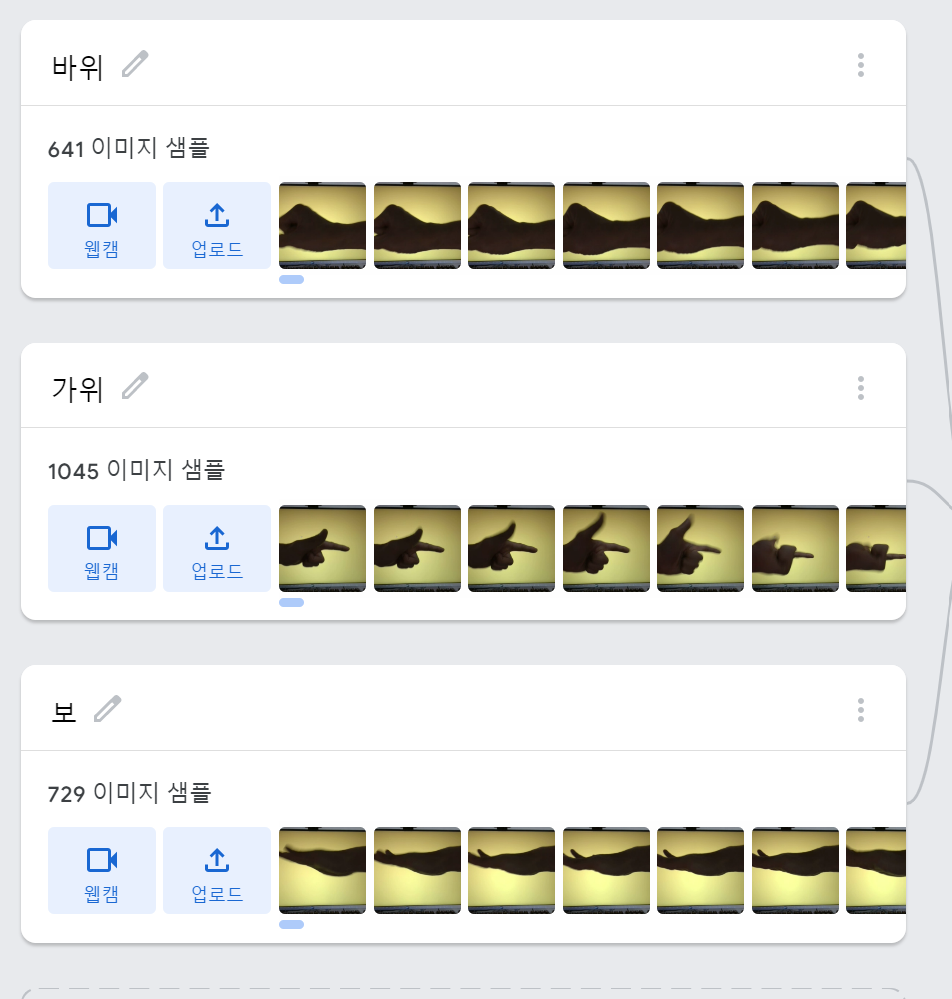

가위 샘플은 총 모양도 포함해야 해서 샘플이 더 많습니다.

### 데이터 준비하기
- **데이터 불러오기**

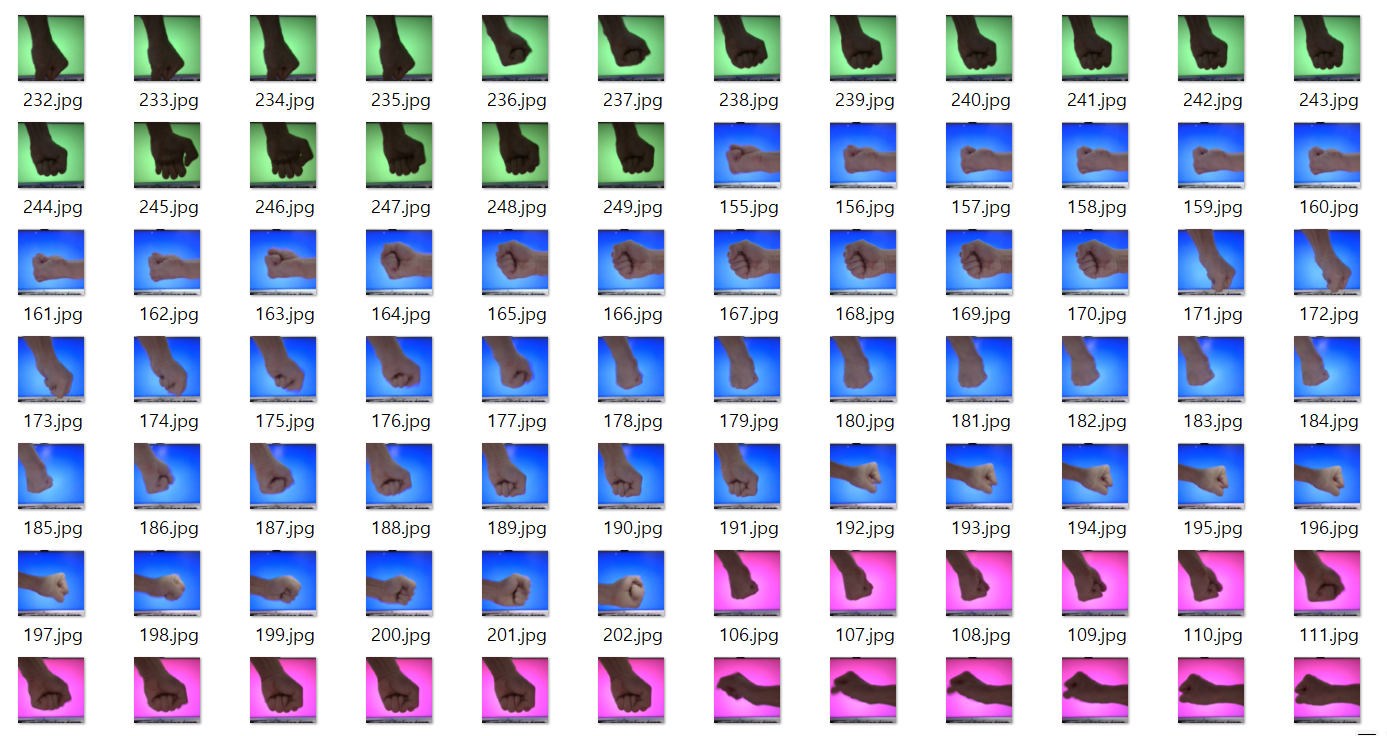

마스크 분류기를 만들면서 느꼈던 점을 참고해서 다양한 배경으로 촬영을 했습니다.

In [37]:
!mkdir -p ~/aiffel/EXPLORATION/dataset/rock_scissor_paper/rock
!mkdir -p ~/aiffel/EXPLORATION/dataset/rock_scissor_paper/scissor
!mkdir -p ~/aiffel/EXPLORATION/dataset/rock_scissor_paper/paper

이하 과정 생략..

In [38]:
image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/dataset/rock_scissor_paper/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/dataset/rock_scissor_paper/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/dataset/rock_scissor_paper/paper"
resize_images(image_dir_path)

641 images resized.
1045 images resized.
729 images resized.


In [39]:
def load_rock_scissor_paper(img_path, number_of_data=2415):
    # 바위 : 0, 가위 : 1, 보 : 2
    
    imgs = np.zeros(number_of_data*img_size*img_size*color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype=np.int32)

    idx = 0
    for file in glob.iglob(img_path + '/rock/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img
        labels[idx] = 0 # 바위 : 0
        idx += 1

    for file in glob.iglob(img_path + '/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img
        labels[idx] = 1 # 가위 : 1
        idx += 1
    
    for file in glob.iglob(img_path + '/paper/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img
        labels[idx] = 2 # 보 : 2
        idx += 1
        
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/dataset/rock_scissor_paper"
(X_train, y_train) = load_rock_scissor_paper(image_dir_path)
X_train = X_train / 255.0

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

X_train shape: (2415, 128, 128, 3)
y_train shape: (2415,)


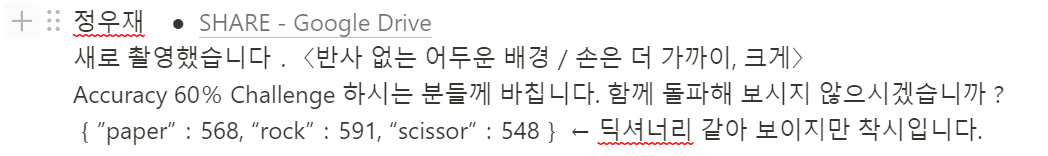

테스트용 데이터는 정우재님의 데이터를 사용하겠습니다.

In [40]:
!mkdir -p ~/aiffel/EXPLORATION/dataset/rock_scissor_paper/test/rock
!mkdir -p ~/aiffel/EXPLORATION/dataset/rock_scissor_paper/test/scissor
!mkdir -p ~/aiffel/EXPLORATION/dataset/rock_scissor_paper/test/paper

이하 생략..

In [41]:
image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/dataset/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/dataset/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/dataset/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

image_dir_path = os.getenv("HOME") + "/aiffel/EXPLORATION/dataset/rock_scissor_paper/test"
(X_test, y_test) = load_rock_scissor_paper(image_dir_path, number_of_data=1707)
X_test = X_test / 255.0

print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

591 images resized.
548 images resized.
568 images resized.
X_test shape: (1707, 128, 128, 3)
y_test shape: (1707,)


사이즈를 128x128 픽셀로 조정하고 `train` 데이터와 `test` 데이터를 만든 후 배열을 섞어주면서 준비를 마칩니다.

In [42]:
X_train_shuffle, y_train_shuffle = shuffle_in_unison_scary(X_train, y_train)
X_test_shuffle, y_test_shuffle = shuffle_in_unison_scary(X_test, y_test)

### 딥러닝 학습하기

In [66]:
n_channel_1 = 8 # 얼마나 다양한 이미지의 특징을 살펴볼 것인가? Layer_1
n_channel_2 = 16 # 얼마나 다양한 이미지의 특징을 살펴볼 것인가? Layer_2
n_dense = 8 # 분류기 알고리즘을 얼마나 복잡하게 할 것인가?
n_train_epoch = 3 # 최종 분류기의 클래스 수

model = mlp_model(n_channel_1, n_channel_2, n_dense, n_train_epoch)

model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 126, 126, 8)       224       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 63, 63, 8)         0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 61, 61, 16)        1168      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 30, 30, 16)        0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 14400)             0         
_________________________________________________________________
dense_34 (Dense)             (None, 8)                 115208    
_________________________________________________________________
dense_35 (Dense)             (None, 3)               

지금도 충분히 내용이 많아져서 과정은 생략했지만

직접 찾은 최적의 복잡도와 다양성 파라미터를 설정해주고 클래스 수는 3개로 수정했습니다.

Epoch 1/20
53/53 [==============================] - 1s 18ms/step - loss: 1.0200 - accuracy: 0.4680 - val_loss: 0.9625 - val_accuracy: 0.5241
Epoch 2/20
53/53 [==============================] - 0s 8ms/step - loss: 0.8167 - accuracy: 0.6183 - val_loss: 0.6781 - val_accuracy: 0.7352
Epoch 3/20
53/53 [==============================] - 0s 8ms/step - loss: 0.5789 - accuracy: 0.7663 - val_loss: 0.5021 - val_accuracy: 0.8331
Epoch 4/20
53/53 [==============================] - 0s 8ms/step - loss: 0.4153 - accuracy: 0.8491 - val_loss: 0.3850 - val_accuracy: 0.8593
Epoch 5/20
53/53 [==============================] - 0s 8ms/step - loss: 0.2968 - accuracy: 0.9148 - val_loss: 0.2686 - val_accuracy: 0.9186
Epoch 6/20
53/53 [==============================] - 0s 8ms/step - loss: 0.1956 - accuracy: 0.9444 - val_loss: 0.1912 - val_accuracy: 0.9531
Epoch 7/20
53/53 [==============================] - 0s 8ms/step - loss: 0.1328 - accuracy: 0.9657 - val_loss: 0.1410 - val_accuracy: 0.9572
Epoch 8/20
53/53 [=

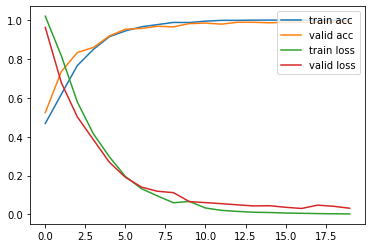

54/54 - 0s - loss: 1.2537 - accuracy: 0.6602
test_loss: 1.2537368535995483
test_accuracy: 0.660222589969635


In [67]:
history = model.fit(X_train_shuffle, y_train_shuffle, validation_split=0.3, epochs=20)

show_history(history)

test_loss, test_accuracy = model.evaluate(X_test_shuffle, y_test_shuffle, verbose=2)

print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

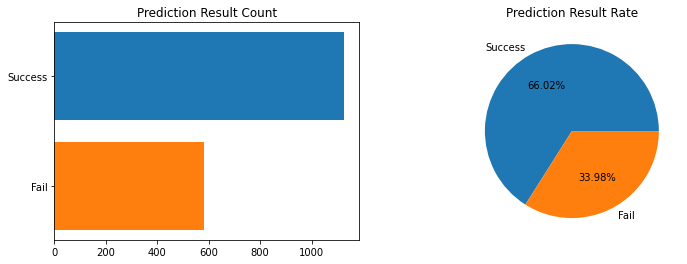

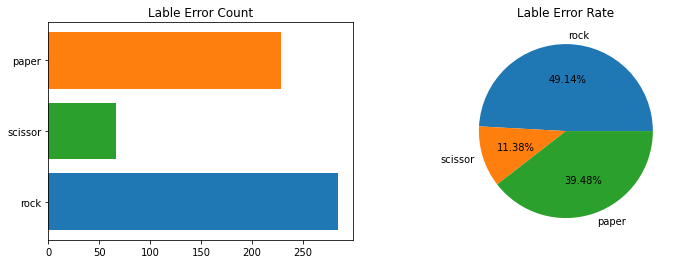

In [68]:
def error_visualization(labels, predction):
    df = pd.DataFrame([labels, predction], index=['lable', 'pred']).T
    df['true'] = (df['lable'] == df['pred'])
    
    true_count = df['true'].value_counts()
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.barh(true_count.keys(), true_count.values, color=['#1f77b4', '#ff7f0e'])
    plt.yticks([True, False], labels=['Success', 'Fail'])
    plt.title('Prediction Result Count')
    plt.subplot(1, 2, 2)
    plt.pie([true_count[True], true_count[False]], labels=['Success', 'Fail'], autopct='%.2f%%')
    plt.title('Prediction Result Rate')
    plt.show()
    
    lable_count = df['lable'].loc[df['true']==False].value_counts()
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.barh(lable_count.keys(), lable_count.values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
    plt.yticks([0, 1, 2], labels=['rock', 'scissor', 'paper'])
    plt.title('Lable Error Count')
    plt.subplot(1, 2, 2)
    plt.pie([lable_count[0], lable_count[1], lable_count[2]], labels=['rock', 'scissor', 'paper'], autopct='%.2f%%')
    plt.title('Lable Error Rate')
    plt.show()

predicted_result = model.predict(X_test_shuffle)
predicted_labels = np.argmax(predicted_result, axis=1)

error_visualization(y_test_shuffle, predicted_labels)

정확도가 66%가 나왔습니다.

사실 파라미터를 아무리 수정해도 나아지는 것 같지는 않고

그저 모델을 학습할 때마다 섞이는 랜덤 스테이트로 인해 결과가 천차만별로 달라집니다.

예측확률분포: [4.6884879e-10 9.9951446e-01 4.8559817e-04]
라벨: 2, 예측결과: 1


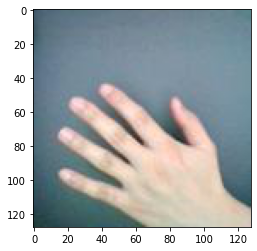

예측확률분포: [6.1389460e-10 9.9946123e-01 5.3874275e-04]
라벨: 2, 예측결과: 1


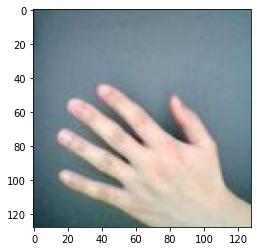

예측확률분포: [2.4563922e-09 9.9941027e-01 5.8967841e-04]
라벨: 2, 예측결과: 1


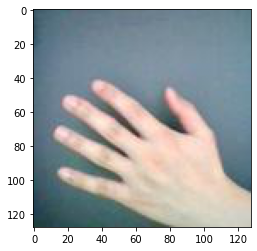

예측확률분포: [2.7976412e-09 9.9939108e-01 6.0889218e-04]
라벨: 2, 예측결과: 1


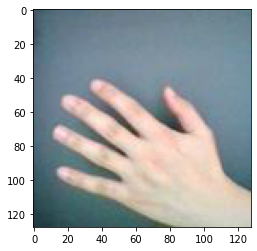

예측확률분포: [2.3975522e-09 9.9938822e-01 6.1179145e-04]
라벨: 2, 예측결과: 1


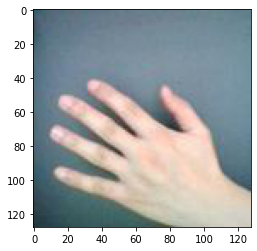

In [69]:
wrong_predict_list=[]

for i, value in enumerate(predicted_result):
    if predicted_labels[i] != y_test_shuffle[i]:
        wrong_predict_list.append([i, value])

wrong_predict_list.sort(key=lambda x: x[1].max(), reverse=True)

for i in wrong_predict_list[:5]:
    i = i[0]
    print("예측확률분포: " + str(predicted_result[i]))
    print("라벨: " + str(y_test_shuffle[i]) + ", 예측결과: " + str(predicted_labels[i]))
    plt.imshow(X_test_shuffle[i], cmap=plt.cm.binary)
    plt.show()

(잘 보시면 전부 다른 이미지입니다.)

가장 예측이 심하게 틀린 순으로 이미지를 보면 비슷한 이미지들에 똑같이 연속으로 예측이 빗나갔습니다.

이 때문에 랜덤 시드에 따라서 결과가 들쑥날쑥 했던 것 같습니다.

즉, 최고의 파라미터는 복잡도도 다양성도 아닌 랜덤 스테이트였습니다.

### 마무리하며

루브릭 평가 기준에 정확히 가위바위보 분류기를 만들라는 말은 없었고

미니 프로젝트에서 이미 가위바위보 분류기를 만들었으니까 꼭 가위바위보 분류기를 만들지 않아도 되겠다 싶어서 마스크 착용유무 분류기를 만들었습니다.

클래스가 삼지선다에서 이지선다로 바뀌었으니 정확도도 75%를 목표로 잡고 있었죠.

그런데 마스크 착용유무라는 것 자체가 예측하기 쉬운 주제였나봅니다.

생각보다 결과가 쉽게 잘 나와서 딱히 이렇다 할 성과도 없고 문득 생각해보니 혹시 언급은 없었지만 주제가 가위바위보에서 벗어나면  
평가 기준에서 제외되는 것이 아닐까 하고 이어서 가위바위보 분류기도 만들었습니다.

함수는 위에서 만들었던 것들을 쓰면 되고, keras도 이미 한 번 만져본 뒤라 어떻게 만져야 좋을지  
정확도는 어떻게 높이면 좋을지도 짐작이 갔기 때문에 60%는 힘들지 않게 달성한 것 같습니다.

모델의 성능을 어떻게 올려야 하는지 제 나름대로 생각해 본 바는

이미지 자체의 다양성입니다. 이렇게도 찍어보고 저렇게도 찍어보고 여기서도 찍어보고 저기서도 찍어보고  
단, 비슷한 이미지가 중복될 수록 학습하기에 좋지 않은 데이터가 됩니다.

저희가 촬영한 이미지들은 연속 촬영으로 어쩔 수 없이 비슷한 이미지가 반복되다 보니까 정확도가 랜덤 시드에 따라 들썩이는 현상이 발생한거구요.

정말 높은 정확도를 원한다면 연속 촬영을 사용하지 않고 정성스레 다양한 각도와 장소에서 촬영한 이미지를 학습해야 될 것 같습니다.